This file is a copy of the CreditOne Classification file with the following changes:
Elilminate observations with LIMIT_BAL > 400,000
EDUCATION has 4 levels, reduced from 7 (4 'other' levels combined into one)

In [75]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

# Import estimators
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Import model metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Import cross validation
from sklearn.cross_validation import train_test_split

In [33]:
# Import raw data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
del rawData ['ID']
rawData.rename(columns = {'default payment next month':'default'}, inplace=True)

In [34]:
# Gather 4 values of 'others' in education into one

d = {1:1, 2:2, 3:3, 0:4,5:4,6:4}
rawData.EDUCATION = rawData.EDUCATION.replace(d)
rawData.EDUCATION.describe()

count    30000.000000
mean         1.842267
std          0.744494
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: EDUCATION, dtype: float64

In [35]:
# Examine structure of raw data set
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [41]:
rawData = pd.DataFrame(rawData[rawData['LIMIT_BAL']< 400000])
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [43]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27925 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    27925 non-null int64
SEX          27925 non-null int64
EDUCATION    27925 non-null int64
MARRIAGE     27925 non-null int64
AGE          27925 non-null int64
PAY_0        27925 non-null int64
PAY_2        27925 non-null int64
PAY_3        27925 non-null int64
PAY_4        27925 non-null int64
PAY_5        27925 non-null int64
PAY_6        27925 non-null int64
BILL_AMT1    27925 non-null int64
BILL_AMT2    27925 non-null int64
BILL_AMT3    27925 non-null int64
BILL_AMT4    27925 non-null int64
BILL_AMT5    27925 non-null int64
BILL_AMT6    27925 non-null int64
PAY_AMT1     27925 non-null int64
PAY_AMT2     27925 non-null int64
PAY_AMT3     27925 non-null int64
PAY_AMT4     27925 non-null int64
PAY_AMT5     27925 non-null int64
PAY_AMT6     27925 non-null int64
default      27925 non-null int64
dtypes: int64(24)
memory usage: 5.3 MB


In [44]:
# Select features
features = rawData.iloc[:,0:23]
print('Summary of features sample:')
features[0:5]

Summary of features sample:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [45]:
print('Summary of rawData first 6 rows:')
rawData.iloc[0:5,0:23]

Summary of rawData first 6 rows:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [46]:
# Set dependent variable
depVar = rawData['default']
depVar[0:5,]

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [47]:
# Set training set for X variables (Feature Space: X Training)
X_train = (features[:10000])
X_train_count = len(X_train.index)
print('The number of observations in the features training set is',str(X_train_count))
X_train.head()

The number of observations in the features training set is 10000


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [48]:
# Set training set for y variable (Independent Variable)
# Dependent Variable Training Set (y Training)

y_train = depVar[: 10000]
y_train_count = len(y_train.index)
print('The number of observations in the y training set is',str(y_train_count))
y_train.head()

The number of observations in the y training set is 10000


0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [49]:
# Set testing set for X variable (Feature Space: X Testing)

X_test = depVar[-3000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is 3000
26765    1
26766    0
26767    0
26768    1
26769    0
Name: default, dtype: int64


In [50]:
# Establish Ground Truth
y_test = depVar[-3000: ]
y_test_count = len(y_test.index)
print('The number of observations in the y testing set is',str(y_test_count))
print(y_test.head())

The number of observations in the y testing set is 3000
26765    1
26766    0
26767    0
26768    1
26769    0
Name: default, dtype: int64


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = .30, random_state = 0)

In [52]:
X_train.shape, X_test.shape

((7000, 23), (3000, 23))

In [53]:
y_train.shape, y_test.shape

((7000,), (3000,))

# Build Models

In [54]:
# Models
modelKNN = KNeighborsClassifier()
modelRF = RandomForestClassifier()
modelGB = GradientBoostingClassifier()
modelLOG = LogisticRegression()
modelSVC = SVC()

In [19]:
print('Summary of features sample:')
features.head()

Summary of features sample:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [20]:
# Print dependent variable
depVar[0:5,]

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [ ]:
# Fit models
modelKNN.fit(X_train, y_train)

In [ ]:
modelRF.fit(X_train, y_train)

In [ ]:
modelGB.fit(X_train, y_train)

In [ ]:
modelLOG.fit(X_train, y_train)

In [ ]:
modelSVC.fit(X_train, y_train)

In [55]:
# Model fitting - KNN
modelKNN.fit(X_train, y_train)
print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train, y_train)

[0.71036847 0.73039006 0.7218174 ]


0.8042857142857143

In [56]:
# Model fitting - RF
modelRF.fit(X_train, y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train, y_train)

[0.78363325 0.78439777 0.77839691]


0.9787142857142858

In [57]:
# Model fitting - GB
modelGB.fit(X_train, y_train)
print(cross_val_score(modelGB, X_train, y_train))
modelGB.score(X_train, y_train)

[0.79905741 0.79682812 0.78568367]


0.8161428571428572

In [58]:
# Model fitting - LOG
modelLOG.fit(X_train, y_train)
print(cross_val_score(modelLOG, X_train, y_train))
modelLOG.score(X_train, y_train)

[0.76735219 0.76810973 0.76682383]


0.7675714285714286

In [59]:
# Model fitting - SVC
modelSVC.fit(X_train, y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train, y_train)

[0.76778063 0.7663952  0.76810973]


0.9948571428571429

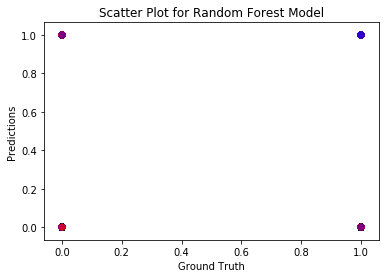

In [82]:
plt.scatter(y_test, predictions, color = ['blue', 'red'], alpha = .25)
plt.title('Scatter Plot for Random Forest Model')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

# Make Predictions

In [62]:
# Make predictions - RF
predictions = modelRF.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))
print('Random Forest Metrics:')
print('Accurancy: %.3f' % predAccuracy)

             precision    recall  f1-score   support

          0       0.82      0.94      0.88      2319
          1       0.60      0.32      0.42       681

avg / total       0.77      0.80      0.77      3000

Random Forest Metrics:
Accurancy: 0.796


In [61]:
# Make predictions - SVC
predictions = modelSVC.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))
print('SVR Metrics:')
print('Accuracy: %.3f' % predAccuracy)

             precision    recall  f1-score   support

          0       0.77      1.00      0.87      2319
          1       0.42      0.01      0.01       681

avg / total       0.69      0.77      0.68      3000

SVR Metrics:
Accuracy: 0.772


In [76]:
# Make predictions - GB
predictions = modelGB.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))
print('GB Metrics:')
print('Accuracy: %.3f' % predAccuracy)

             precision    recall  f1-score   support

          0       0.83      0.95      0.89      2319
          1       0.66      0.34      0.45       681

avg / total       0.79      0.81      0.79      3000

GB Metrics:
Accuracy: 0.810


In [77]:
# Make predictions - LOG
predictions = modelLOG.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))
print('LOG Metrics:')
print('Accuracy: %.3f' % predAccuracy)

             precision    recall  f1-score   support

          0       0.77      1.00      0.87      2319
          1       1.00      0.00      0.00       681

avg / total       0.82      0.77      0.67      3000

LOG Metrics:
Accuracy: 0.773


In [78]:
# Make predictions - SVC
predictions = modelKNN.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))
print('SVR Metrics:')
print('Accuracy: %.3f' % predAccuracy)

             precision    recall  f1-score   support

          0       0.79      0.90      0.84      2319
          1       0.35      0.17      0.23       681

avg / total       0.69      0.74      0.70      3000

SVR Metrics:
Accuracy: 0.739
